<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Box Plots**


Estimated time needed: **45** minutes


In this lab, you will focus on the visualization of data. The dataset will be provided through an RDBMS, and you will need to use SQL queries to extract the required data.


## Objectives


In this lab you will perform the following:


-   Visualize the distribution of data.

-   Visualize the relationship between two features.

-   Visualize data composition and comparisons using box plots.


### Setup: Connecting to the Database


#### 1. Download the Database File


In [61]:
!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/QR9YeprUYhOoLafzlLspAw/survey-results-public.sqlite

--2025-01-09 06:47:42--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/QR9YeprUYhOoLafzlLspAw/survey-results-public.sqlite
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104, 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 211415040 (202M) [application/octet-stream]
Saving to: ‘survey-results-public.sqlite.1’

survey-results-publ 100%[===================>] 201.62M  57.4MB/s    in 3.6s    

2025-01-09 06:47:48 (56.7 MB/s) - ‘survey-results-public.sqlite.1’ saved [211415040/211415040]



#### 2. Connect to the Database


**Install the needed libraries**


In [62]:
!pip install pandas

In [63]:
!pip install matplotlib
!pip install seaborn

In [64]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Connect to the SQLite database
conn = sqlite3.connect('survey-results-public.sqlite')


## Demo: Basic SQL Queries


#### Demo 1: Count the Number of Rows in the Table


In [65]:
QUERY = "SELECT COUNT(*) FROM main"
df = pd.read_sql_query(QUERY, conn)
print(df)


   COUNT(*)
0     65437


#### Demo 2: List All Tables


In [66]:
QUERY = """
SELECT name as Table_Name 
FROM sqlite_master 
WHERE type = 'table'
"""
pd.read_sql_query(QUERY, conn)


,Table_Name
0,main


#### Demo 3: Group Data by Age


In [67]:
QUERY = """
SELECT Age, COUNT(*) as count 
FROM main 
GROUP BY Age 
ORDER BY Age
"""
df_age = pd.read_sql_query(QUERY, conn)
print(df_age)


                  Age  count
0     18-24 years old  14098
1     25-34 years old  23911
2     35-44 years old  14942
3     45-54 years old   6249
4     55-64 years old   2575
5   65 years or older    772
6   Prefer not to say    322
7  Under 18 years old   2568


## Visualizing Data


### Task 1: Visualizing the Distribution of Data


**1. Box Plot of `CompTotal` (Total Compensation)**


Use a box plot to analyze the distribution and outliers in total compensation.


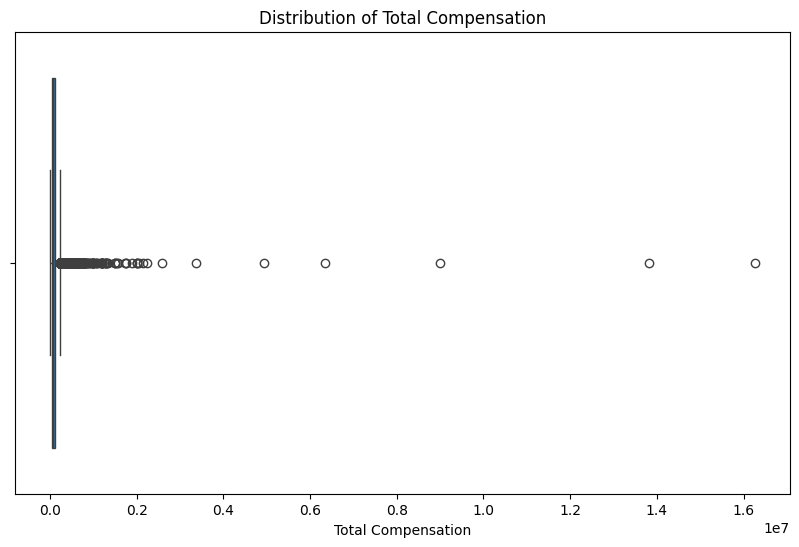

In [68]:
# Reconnect to the SQLite database
conn = sqlite3.connect('survey-data.sqlite')

# Load the data into a DataFrame using an SQL query
query = "SELECT * FROM main WHERE ConvertedCompYearly IS NOT NULL"
df_filtered = pd.read_sql_query(query, conn)

# Close the connection
conn.close()

# Create the box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x=df_filtered['ConvertedCompYearly'])

# Set labels and title
plt.xlabel('Total Compensation')
plt.ylabel('') 
plt.title('Distribution of Total Compensation')

# Show the plot
plt.show()


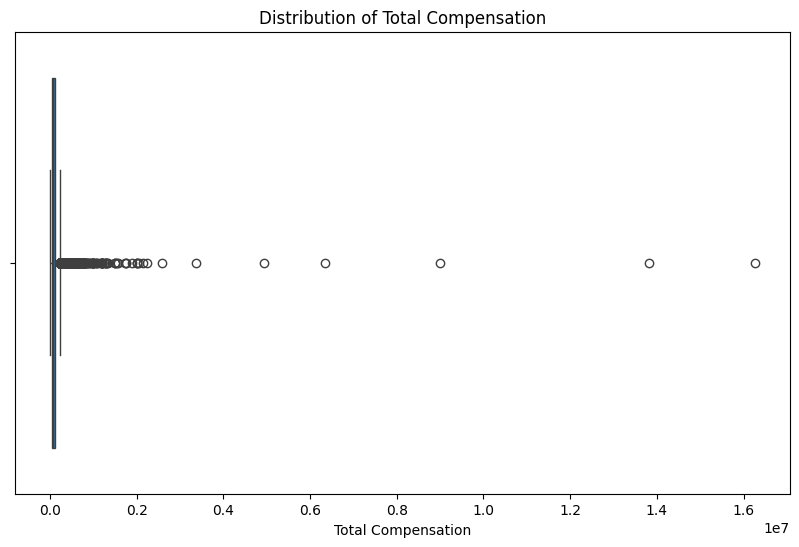

In [69]:
# Load the data
df = pd.read_csv("survey-data.csv")

# Filter out missing values in CompTotal
df_filtered = df[df['ConvertedCompYearly'].notna()] 

# Create the box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x=df_filtered['ConvertedCompYearly'])

# Set labels and title
plt.xlabel('Total Compensation')
plt.ylabel('') 
plt.title('Distribution of Total Compensation')

# Show the plot
plt.show()

**2. Box Plot of Age (converted to numeric values)**


Convert the `Age` column into numerical values and visualize the distribution.


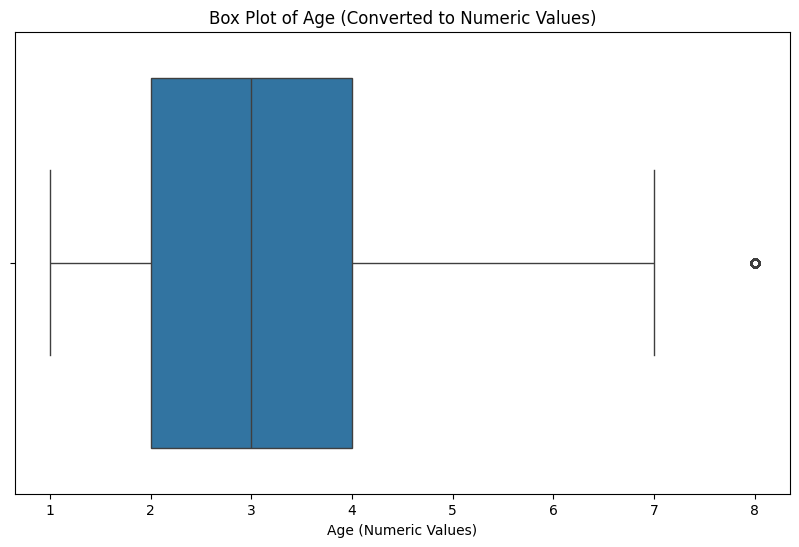

In [70]:
# your code goes here

# Reconnect to the SQLite database
conn = sqlite3.connect('survey-data.sqlite')

# Load the data into a DataFrame using an SQL query
query = "SELECT * FROM main"
df = pd.read_sql_query(query, conn)

# Close the connection
conn.close()

# Convert the 'Age' column to numeric values
age_mapping = {
    'Under 18 years old': 1, '18-24 years old': 2, '25-34 years old': 3, '35-44 years old': 4,
    '45-54 years old': 5, '55-64 years old': 6, '65 years or older': 7, 'Prefer not to say': 8
}
df['AgeNum'] = df['Age'].map(age_mapping)

# Create the box plot for AgeNum
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['AgeNum'])

# Set labels and title
plt.xlabel('Age (Numeric Values)')
plt.ylabel('')
plt.title('Box Plot of Age (Converted to Numeric Values)')

# Show the plot
plt.show()


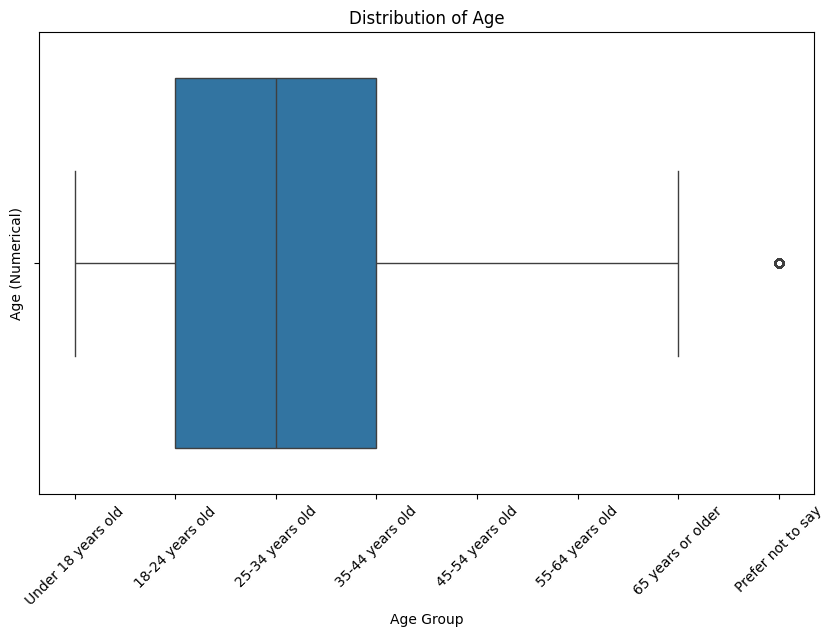

In [71]:
# Create a dictionary to map age ranges to numerical values
age_mapping = {
    'Under 18 years old': 0,
    '18-24 years old': 1,
    '25-34 years old': 2,
    '35-44 years old': 3,
    '45-54 years old': 4,
    '55-64 years old': 5,
    '65 years or older': 6,
    'Prefer not to say': 7
}

# Map age ranges to numerical values in the DataFrame
df['Age_Numeric'] = df['Age'].map(age_mapping)

# Create the box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x='Age_Numeric', data=df)

# Set labels and title
plt.xlabel('Age Group')
plt.ylabel('Age (Numerical)')
plt.title('Distribution of Age')

# Customize x-axis labels
plt.xticks(range(8), age_mapping.keys(), rotation=45) 

# Show the plot
plt.show()

### Task 2: Visualizing Relationships in Data


**1. Box Plot of `CompTotal` Grouped by Age Groups:**


Visualize the distribution of compensation across different age groups.


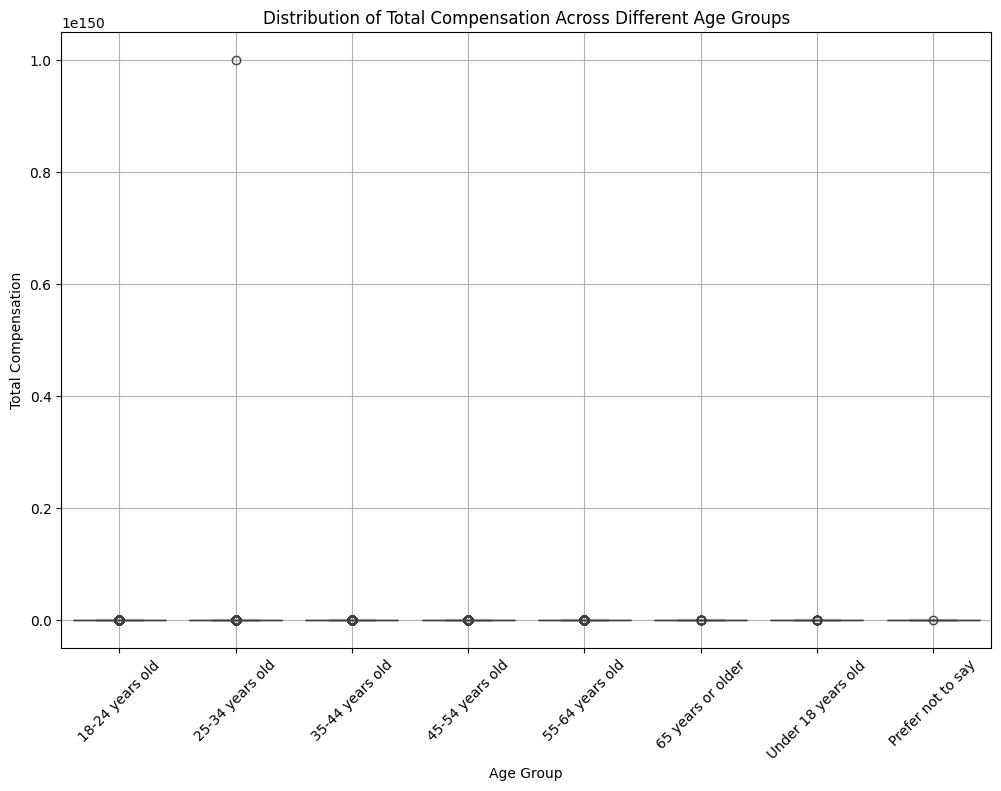

In [72]:
# your code goes here

# Reconnect to the SQLite database
conn = sqlite3.connect('survey-data.sqlite')

# Load the data into a DataFrame using an SQL query
query = "SELECT Age, CompTotal FROM main WHERE CompTotal IS NOT NULL AND Age IS NOT NULL"
df = pd.read_sql_query(query, conn)

# Close the connection
conn.close()

# Plot the box plot for CompTotal grouped by Age
plt.figure(figsize=(12, 8))
sns.boxplot(x='Age', y='CompTotal', data=df)
plt.title('Distribution of Total Compensation Across Different Age Groups')
plt.xlabel('Age Group')
plt.ylabel('Total Compensation')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

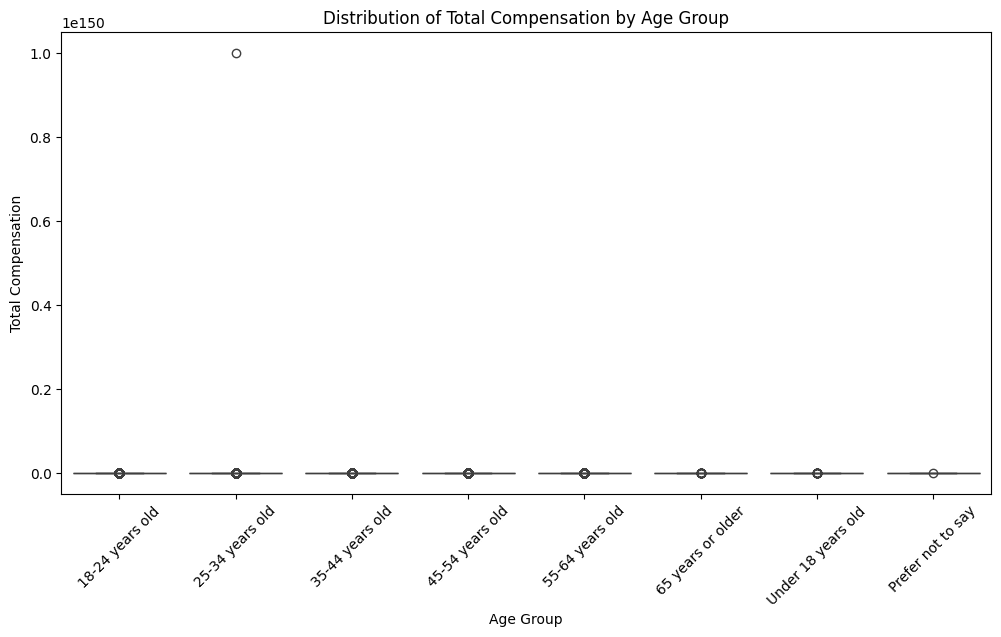

In [73]:
# Filter out missing values
df_filtered = df[df['CompTotal'].notna()]

# Create the box plot
plt.figure(figsize=(12, 6)) 
sns.boxplot(x='Age', y='CompTotal', data=df_filtered)

# Set labels and title
plt.xlabel('Age Group')
plt.ylabel('Total Compensation')
plt.title('Distribution of Total Compensation by Age Group')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.show()

**2. Box Plot of `CompTotal` Grouped by Job Satisfaction (`JobSatPoints_6`):**


Examine how compensation varies based on job satisfaction levels.


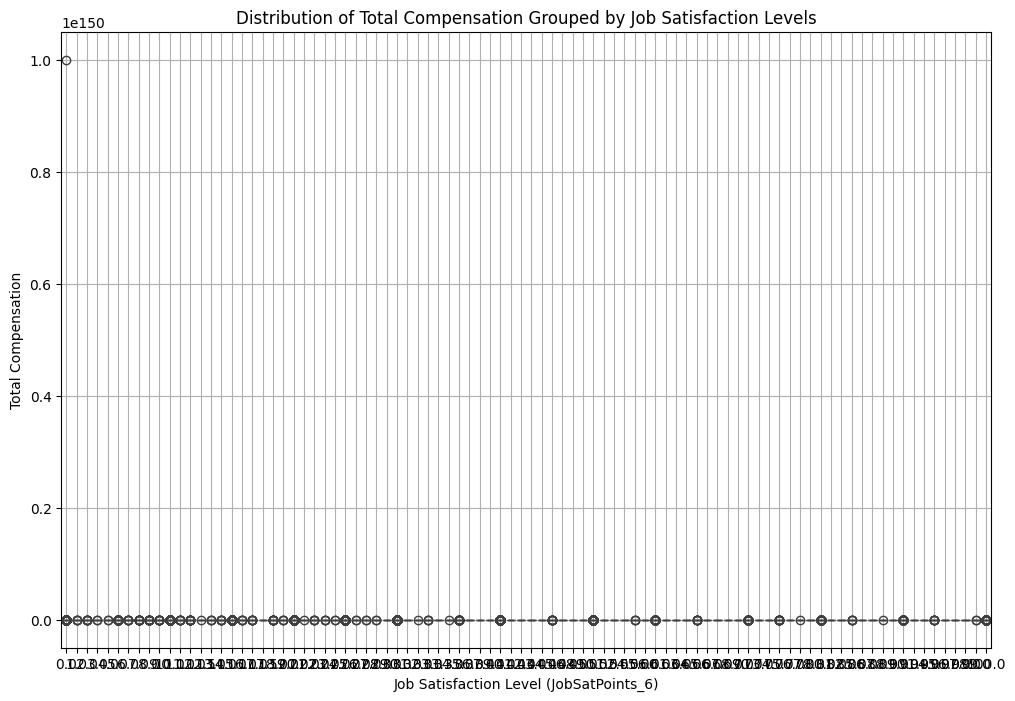

In [74]:
# Reconnect to the SQLite database
conn = sqlite3.connect('survey-data.sqlite')

# Load the data into a DataFrame using an SQL query
query = "SELECT CompTotal, JobSatPoints_6 FROM main WHERE CompTotal IS NOT NULL AND JobSatPoints_6 IS NOT NULL"
df = pd.read_sql_query(query, conn)

# Close the connection
conn.close()

# Plot the box plot for CompTotal grouped by JobSatPoints_6
plt.figure(figsize=(12, 8))
sns.boxplot(x='JobSatPoints_6', y='CompTotal', data=df)
plt.title('Distribution of Total Compensation Grouped by Job Satisfaction Levels')
plt.xlabel('Job Satisfaction Level (JobSatPoints_6)')
plt.ylabel('Total Compensation')
plt.grid(True)
plt.show()


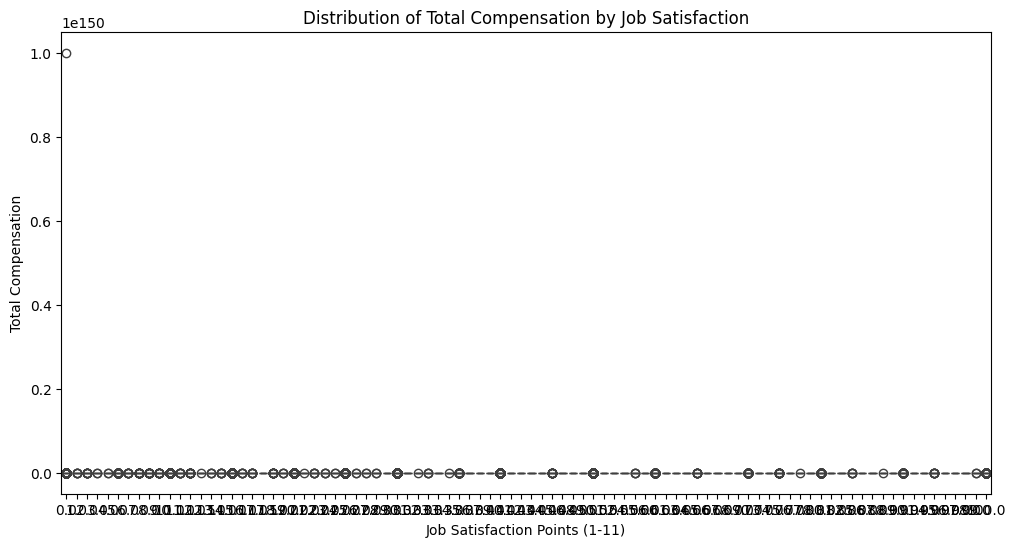

In [75]:
# Filter out missing values
df_filtered = df[(df['CompTotal'].notna()) & (df['JobSatPoints_6'].notna())] 

# Create the box plot
plt.figure(figsize=(12, 6))
sns.boxplot(x='JobSatPoints_6', y='CompTotal', data=df_filtered)

# Set labels and title
plt.xlabel('Job Satisfaction Points (1-11)')
plt.ylabel('Total Compensation')
plt.title('Distribution of Total Compensation by Job Satisfaction')

# Show the plot
plt.show()

### Task 3: Visualizing the Composition of Data


**1. Box Plot of `ConvertedCompYearly` for the Top 5 Developer Types:**


Analyze compensation across the top 5 developer roles.


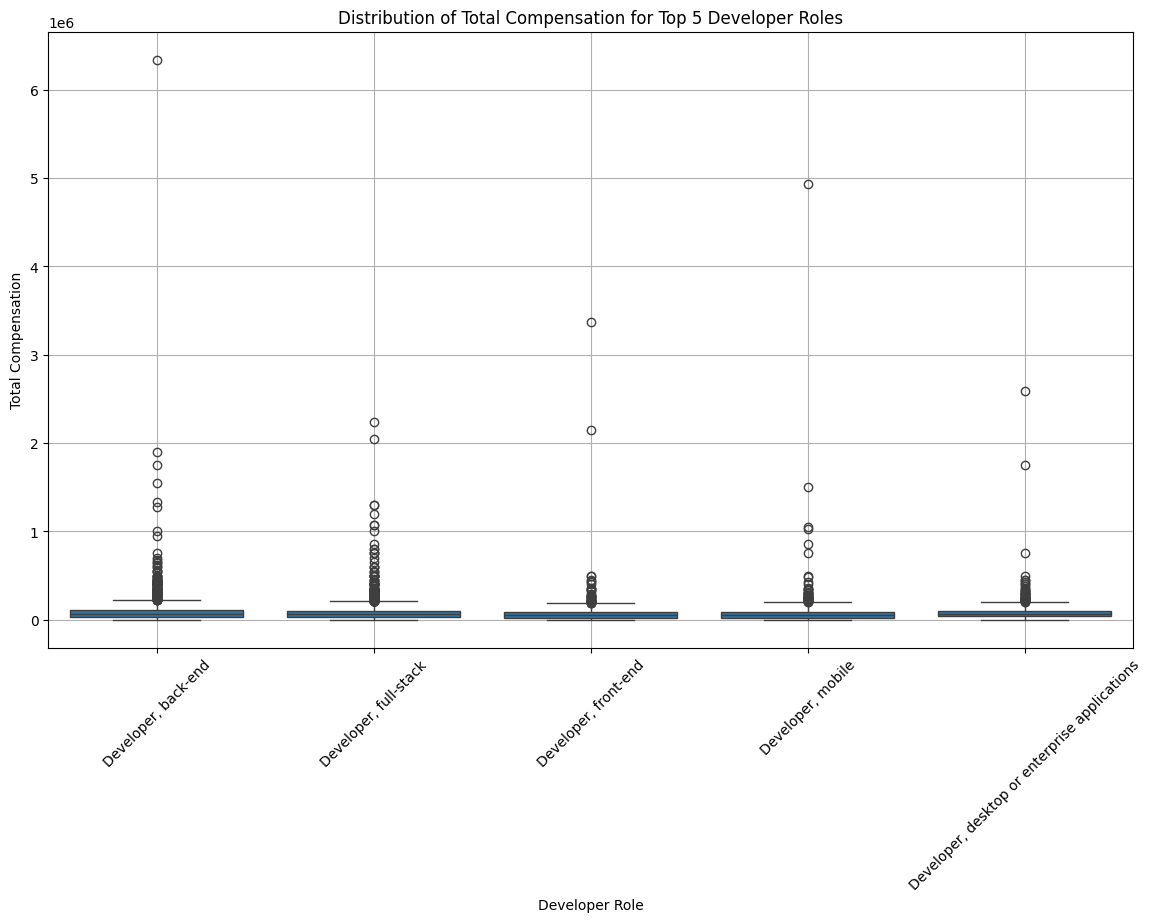

In [76]:
# Reconnect to the SQLite database
conn = sqlite3.connect('survey-data.sqlite')

# Load the data into a DataFrame using an SQL query
query = "SELECT DevType, ConvertedCompYearly FROM main WHERE ConvertedCompYearly IS NOT NULL AND DevType IS NOT NULL"
df = pd.read_sql_query(query, conn)

# Close the connection
conn.close()

# Split the 'DevType' column by ';' and explode it into separate rows
df_exploded = df['DevType'].str.split(';', expand=True).stack().reset_index(level=1, drop=True)
df_exploded = df_exploded.to_frame(name='DevType')

# Safely repeat the 'ConvertedCompYearly' values
df_exploded['ConvertedCompYearly'] = df['ConvertedCompYearly'].loc[df.index].repeat(df['DevType'].str.count(';').values + 1).reset_index(drop=True)

# Get the top 5 developer types
top_5_devtypes = df_exploded['DevType'].value_counts().nlargest(5).index

# Filter the DataFrame for the top 5 developer types
df_top_5 = df_exploded[df_exploded['DevType'].isin(top_5_devtypes)]

# Plot the box plot for ConvertedCompYearly grouped by DevType
plt.figure(figsize=(14, 8))
sns.boxplot(x='DevType', y='ConvertedCompYearly', data=df_top_5)
plt.title('Distribution of Total Compensation for Top 5 Developer Roles')
plt.xlabel('Developer Role')
plt.ylabel('Total Compensation')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


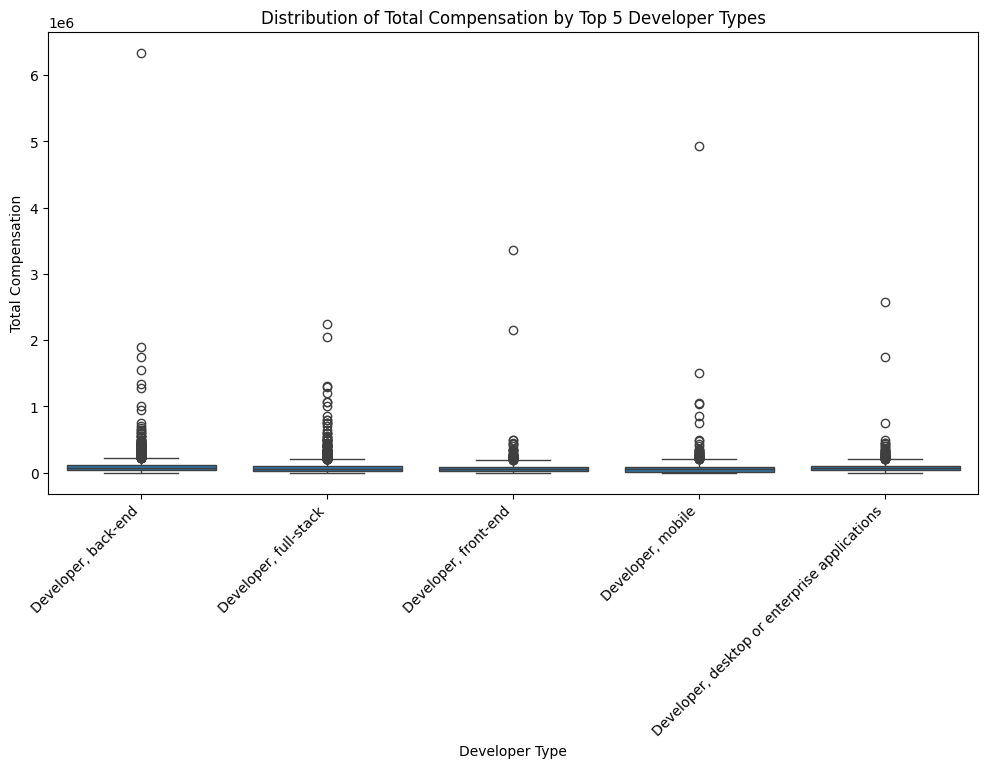

In [77]:
# Filter out missing values
df_filtered = df[df['ConvertedCompYearly'].notna() & df['DevType'].notna()]

# Get the top 5 most frequent DevType
top_5_devtypes = df_filtered['DevType'].str.split(';', expand=True).stack().value_counts().head(5).index.tolist()

# Filter DataFrame for top 5 DevTypes
df_top_5 = df_filtered[df_filtered['DevType'].str.contains('|'.join(top_5_devtypes))]

# Create the box plot
plt.figure(figsize=(12, 6))
sns.boxplot(x='DevType', y='ConvertedCompYearly', data=df_top_5)
plt.xlabel('Developer Type')
plt.ylabel('Total Compensation')
plt.title('Distribution of Total Compensation by Top 5 Developer Types')
plt.xticks(rotation=45, ha='right')
plt.show()

**2. Box Plot of `CompTotal` for the Top 5 Countries:**


Analyze compensation across respondents from the top 5 countries.


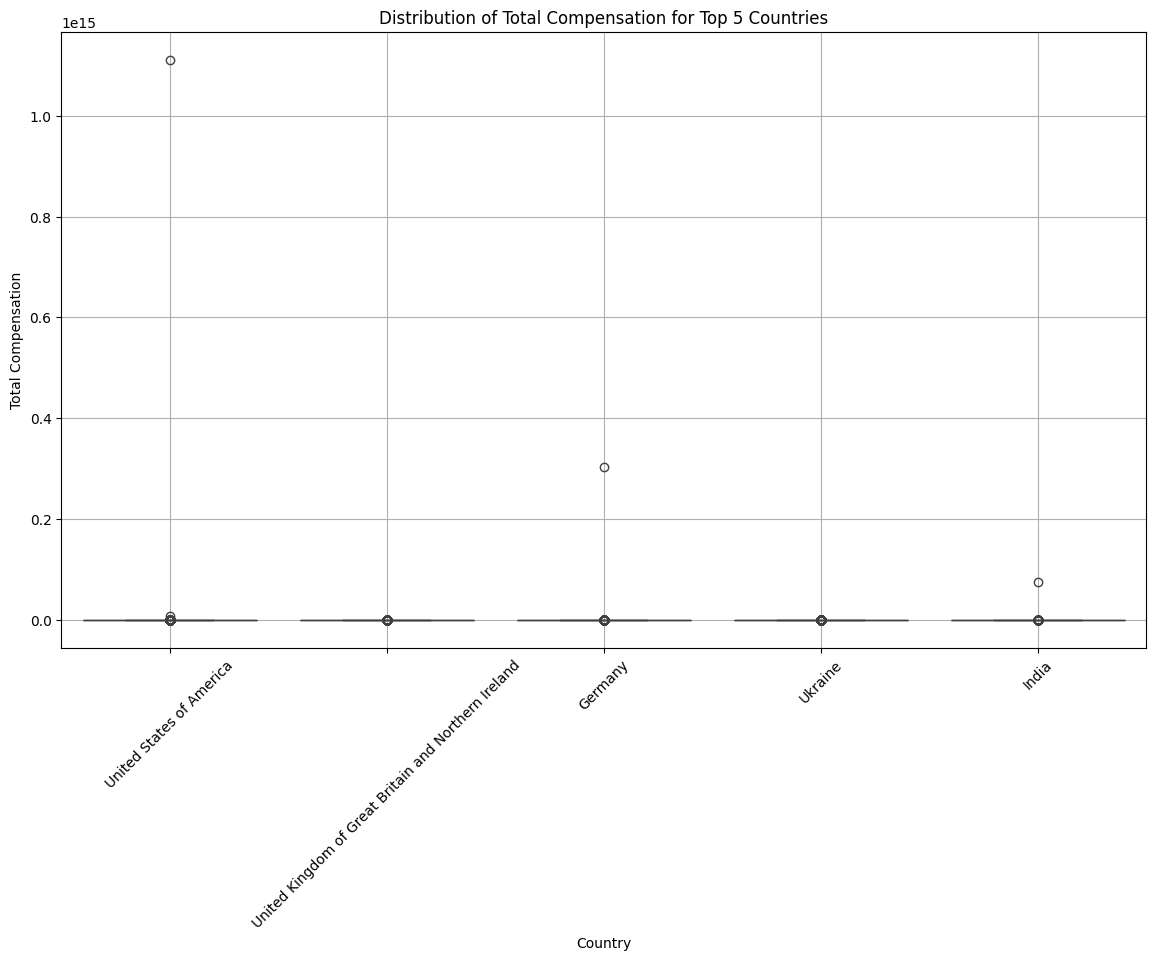

In [78]:
# Reconnect to the SQLite database
conn = sqlite3.connect('survey-data.sqlite')

# Load the data into a DataFrame using an SQL query
query = "SELECT Country, CompTotal FROM main WHERE CompTotal IS NOT NULL"
df = pd.read_sql_query(query, conn)

# Close the connection
conn.close()

# Get the top 5 countries
top_5_countries = df['Country'].value_counts().nlargest(5).index

# Filter the DataFrame for the top 5 countries
df_top_5 = df[df['Country'].isin(top_5_countries)]

# Plot the box plot for CompTotal grouped by Country
plt.figure(figsize=(14, 8))
sns.boxplot(x='Country', y='CompTotal', data=df_top_5)
plt.title('Distribution of Total Compensation for Top 5 Countries')
plt.xlabel('Country')
plt.ylabel('Total Compensation')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


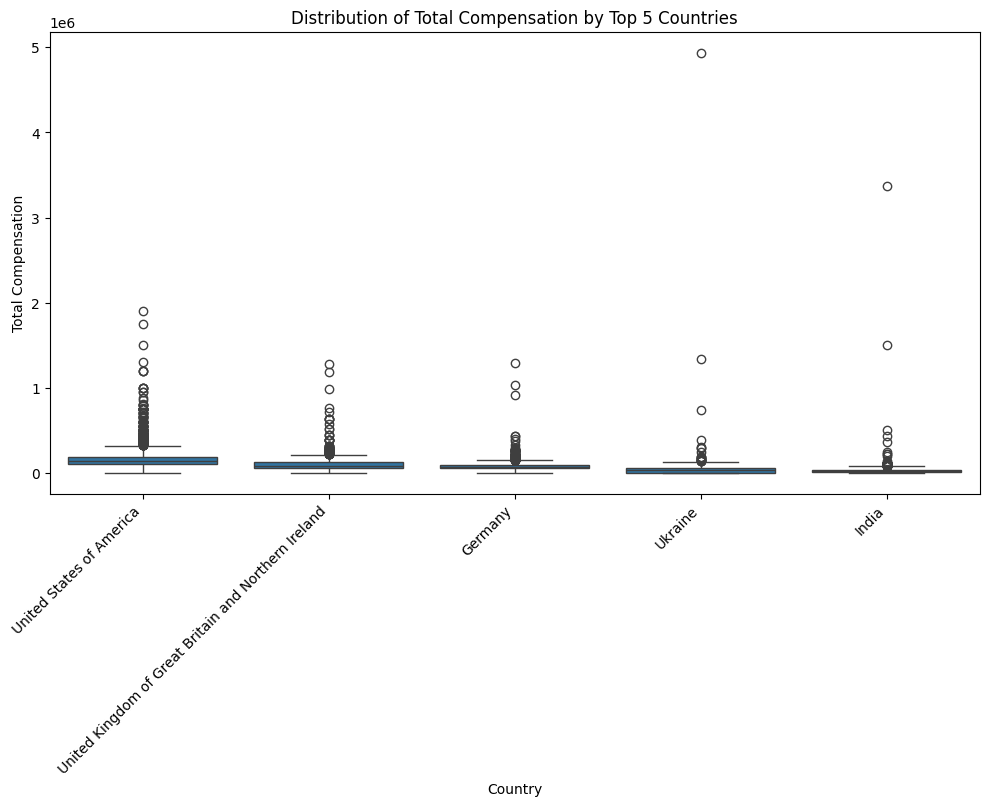

In [79]:
# Load the data
try:
    df = pd.read_csv('survey-data.csv')
except FileNotFoundError:
    print("Error: 'survey-data.csv' not found. Please check the file path.")
    exit()

# Filter out missing values
df_filtered = df[df['ConvertedCompYearly'].notna() & df['Country'].notna()]

# Get the top 5 countries with the most respondents
top_5_countries = df_filtered['Country'].value_counts().head(5).index.tolist()

# Filter DataFrame for top 5 countries
df_top_5_countries = df_filtered[df_filtered['Country'].isin(top_5_countries)]

# Create the box plot
plt.figure(figsize=(12, 6))
sns.boxplot(x='Country', y='ConvertedCompYearly', data=df_top_5_countries)

# Set labels and title
plt.xlabel('Country')
plt.ylabel('Total Compensation')
plt.title('Distribution of Total Compensation by Top 5 Countries')
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.show()

### Task 4: Visualizing Comparison of Data


**1. Box Plot of CompTotal Across Employment Types:**


Analyze compensation for different employment types.


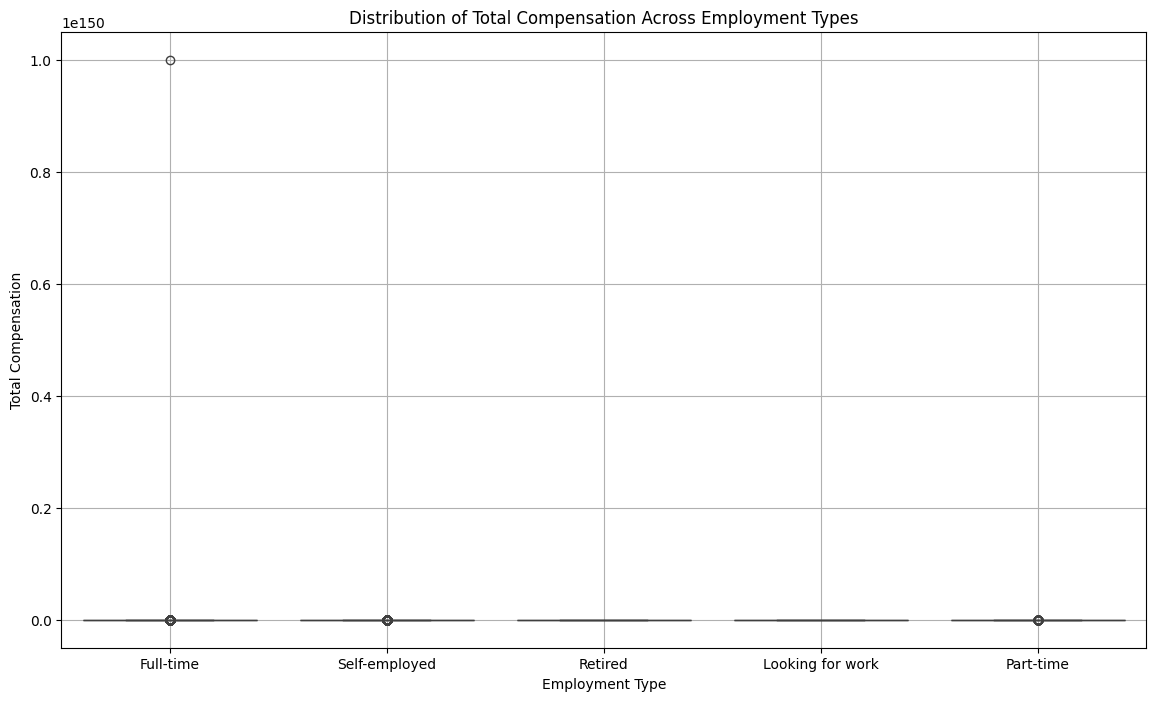

In [80]:
# Reconnect to the SQLite database
conn = sqlite3.connect('survey-data.sqlite')

# Load the data into a DataFrame using an SQL query
query = "SELECT Employment, CompTotal FROM main WHERE CompTotal IS NOT NULL AND Employment IS NOT NULL"
df = pd.read_sql_query(query, conn)

# Close the connection
conn.close()

# Simplify the employment types for readability
employment_mapping = {
    'Employed, full-time': 'Full-time',
    'Employed, part-time': 'Part-time',
    'Independent contractor, freelancer, or self-employed': 'Self-employed',
    'Not employed, and not looking for work': 'Not looking',
    'Not employed, but looking for work': 'Looking for work',
    'Retired': 'Retired',
    'Student, full-time': 'Full-time student',
    'Student, part-time': 'Part-time student',
    'Other': 'Other'
}
df['EmploymentSimplified'] = df['Employment'].map(employment_mapping)

# Plot the box plot for CompTotal grouped by EmploymentSimplified
plt.figure(figsize=(14, 8))
sns.boxplot(x='EmploymentSimplified', y='CompTotal', data=df)
plt.title('Distribution of Total Compensation Across Employment Types')
plt.xlabel('Employment Type')
plt.ylabel('Total Compensation')
plt.grid(True)
plt.show()


/tmp/ipykernel_136/485662391.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['Employment'] = df_filtered['Employment'].map(employment_map)


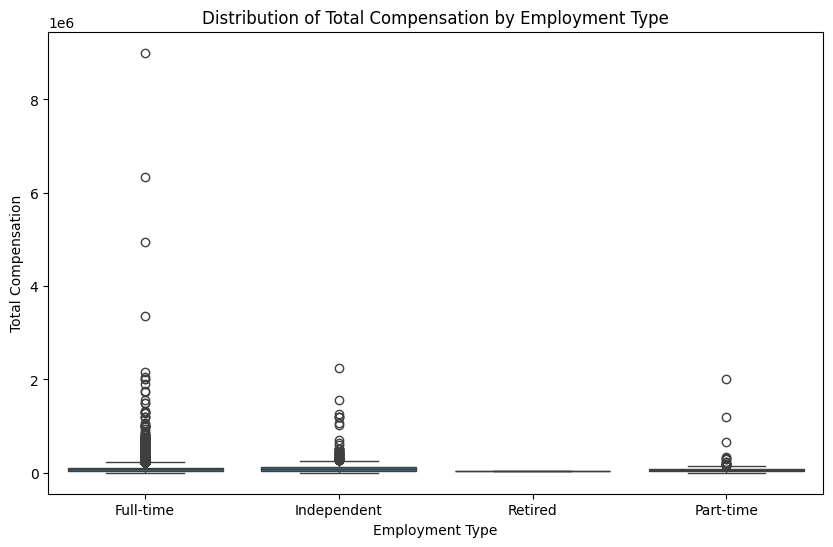

In [81]:

# Load the data
try:
    df = pd.read_csv('survey-data.csv')
except FileNotFoundError:
    print("Error: 'survey-data.csv' not found. Please check the file path.")
    exit()

# Filter out missing values
df_filtered = df[df['ConvertedCompYearly'].notna() & df['Employment'].notna()]

# Map employment types for better readability
employment_map = {
    'Employed, full-time': 'Full-time',
    'Employed, part-time': 'Part-time',
    'Student, full-time': 'Student (Full-time)',
    'Student, part-time': 'Student (Part-time)',
    'Independent contractor, freelancer, or self-employed': 'Independent',
    'Retired': 'Retired',
    'Other': 'Other' 
}
df_filtered['Employment'] = df_filtered['Employment'].map(employment_map)

# Create the box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x='Employment', y='ConvertedCompYearly', data=df_filtered)

# Set labels and title
plt.xlabel('Employment Type')
plt.ylabel('Total Compensation')
plt.title('Distribution of Total Compensation by Employment Type')

# Show the plot
plt.show()

**2. Box Plot of `YearsCodePro` by Job Satisfaction (`JobSatPoints_6`):**


Examine the distribution of professional coding years by job satisfaction levels.


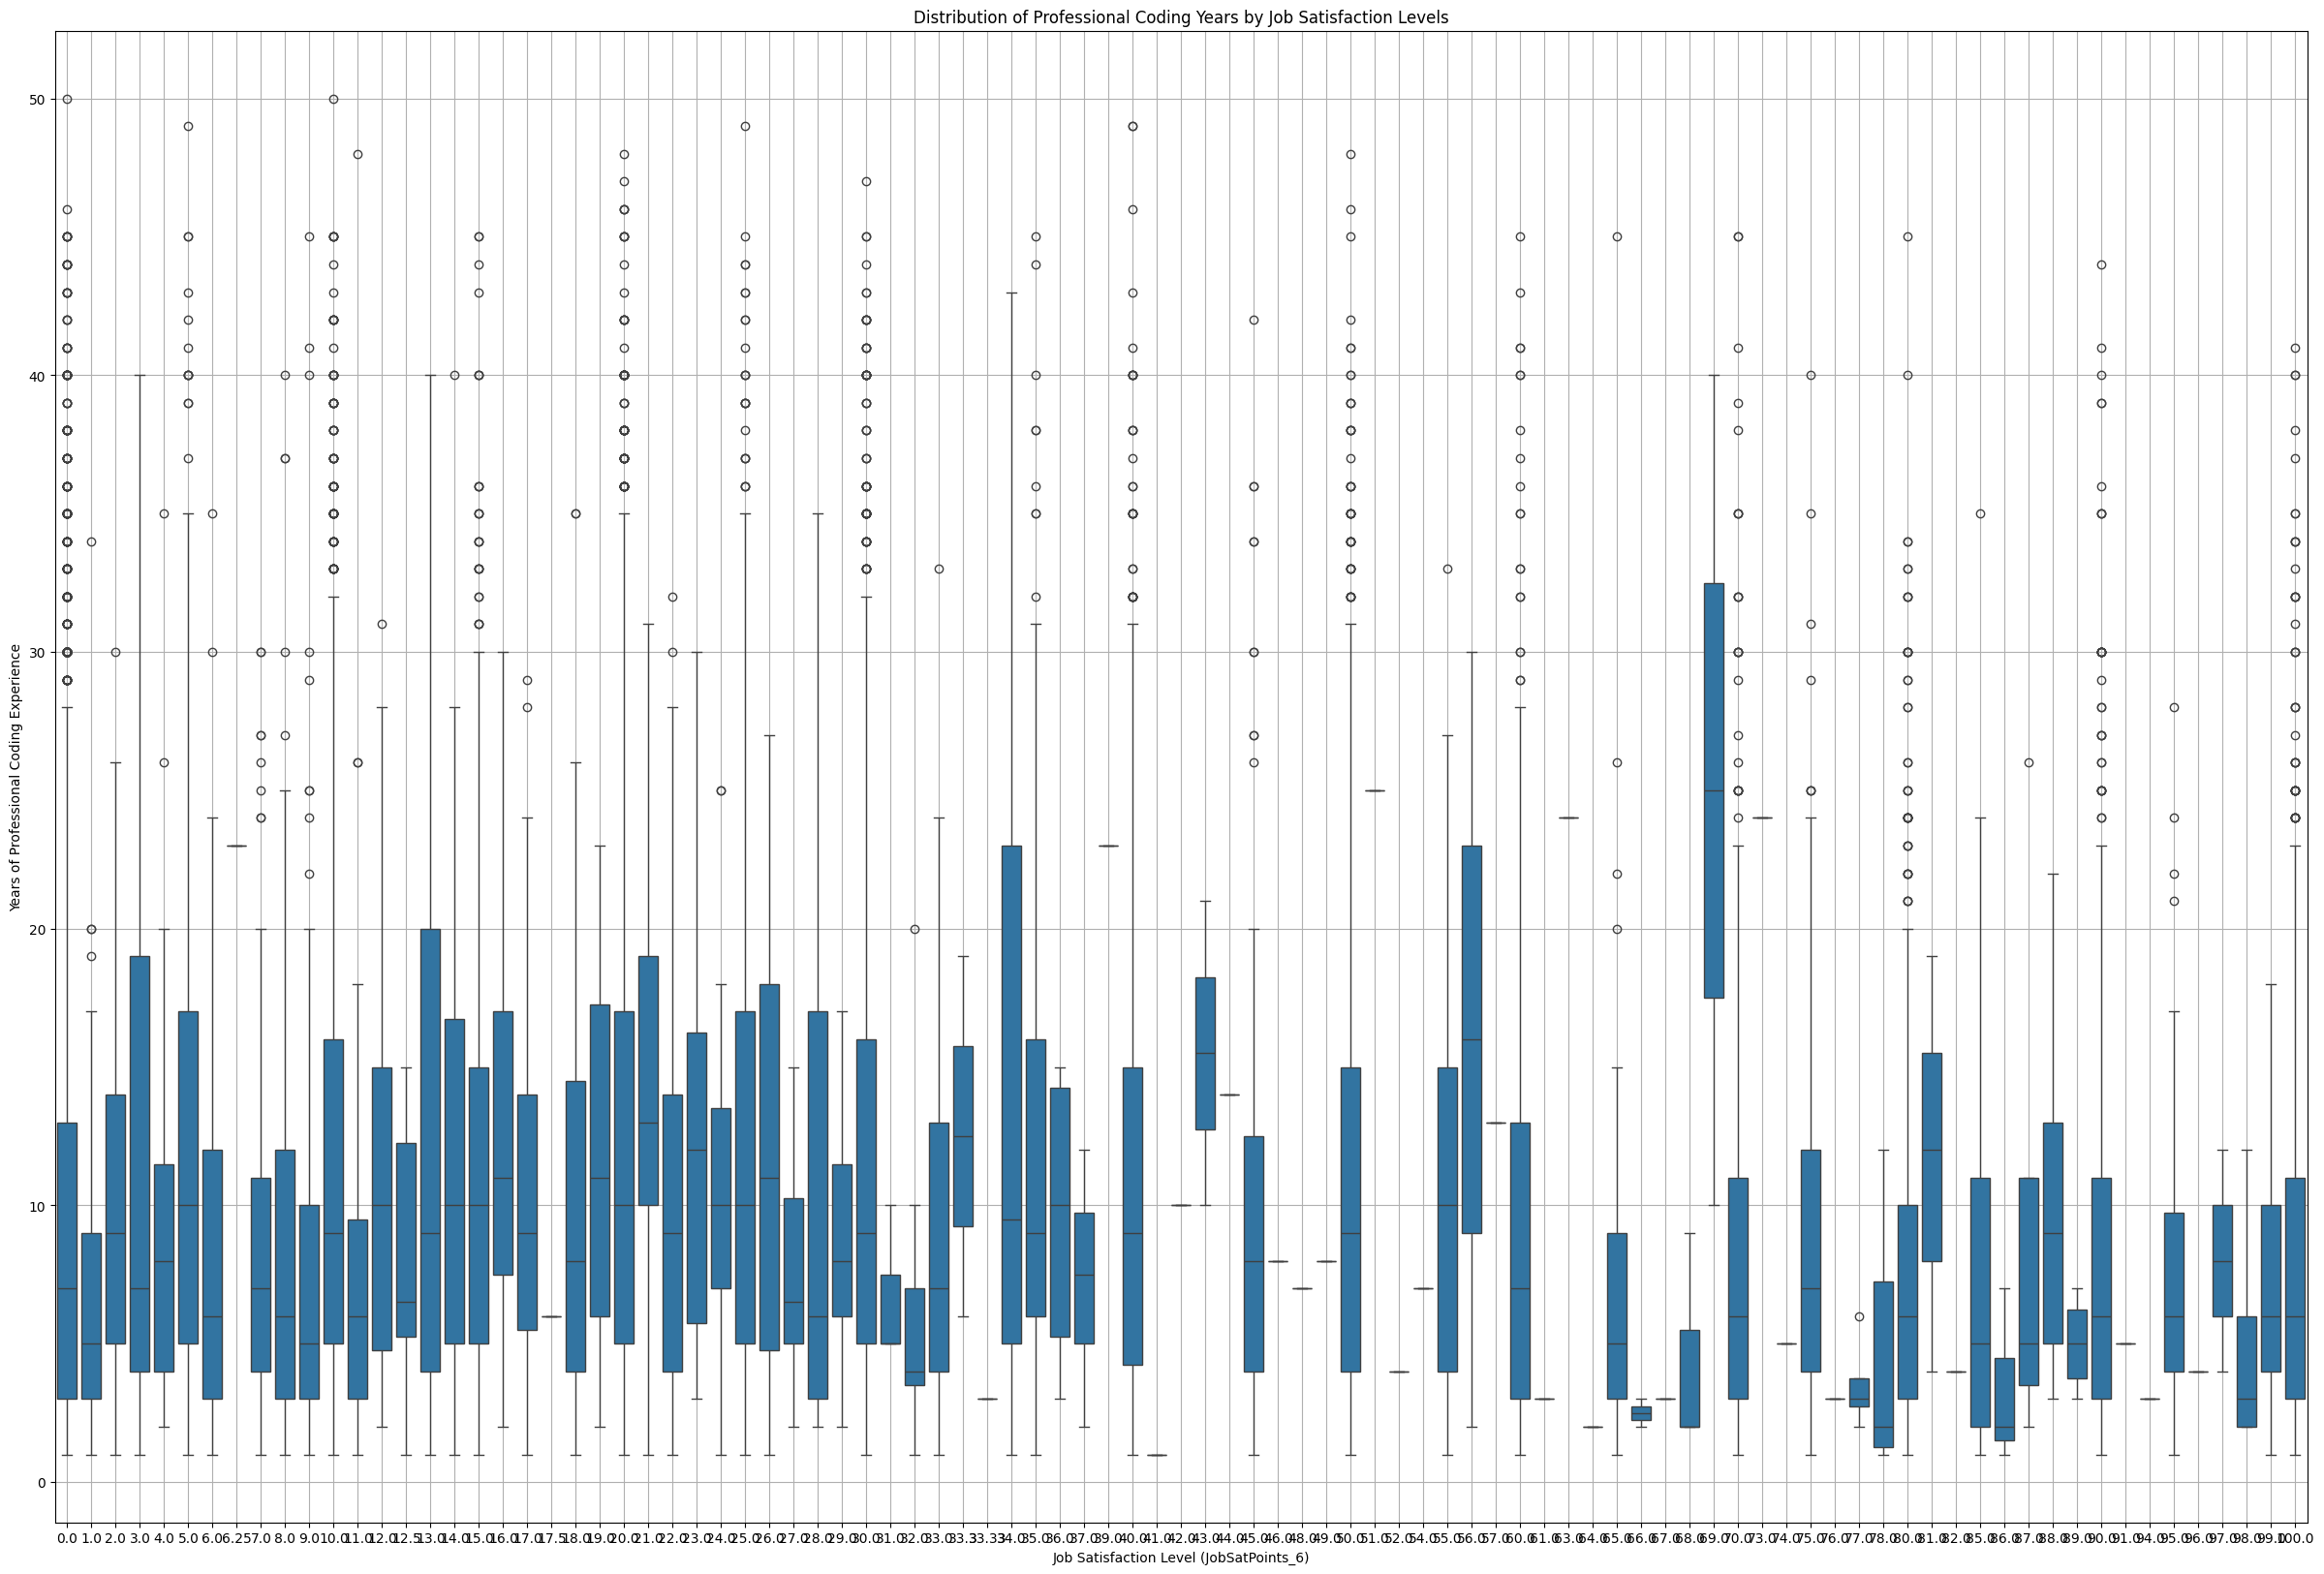

In [82]:

# Reconnect to the SQLite database
conn = sqlite3.connect('survey-data.sqlite')

# Load the data into a DataFrame using an SQL query
query = "SELECT YearsCodePro, JobSatPoints_6 FROM main WHERE YearsCodePro IS NOT NULL AND JobSatPoints_6 IS NOT NULL"
df = pd.read_sql_query(query, conn)

# Close the connection
conn.close()

# Convert 'YearsCodePro' to numeric values, handling non-numeric entries
df['YearsCodePro'] = pd.to_numeric(df['YearsCodePro'], errors='coerce')

# Plot the box plot for YearsCodePro grouped by JobSatPoints_6
plt.figure(figsize=(30, 20))
sns.boxplot(x='JobSatPoints_6', y='YearsCodePro', data=df)
plt.title('Distribution of Professional Coding Years by Job Satisfaction Levels')
plt.xlabel('Job Satisfaction Level (JobSatPoints_6)')
plt.ylabel('Years of Professional Coding Experience')
plt.grid(True)
plt.show()


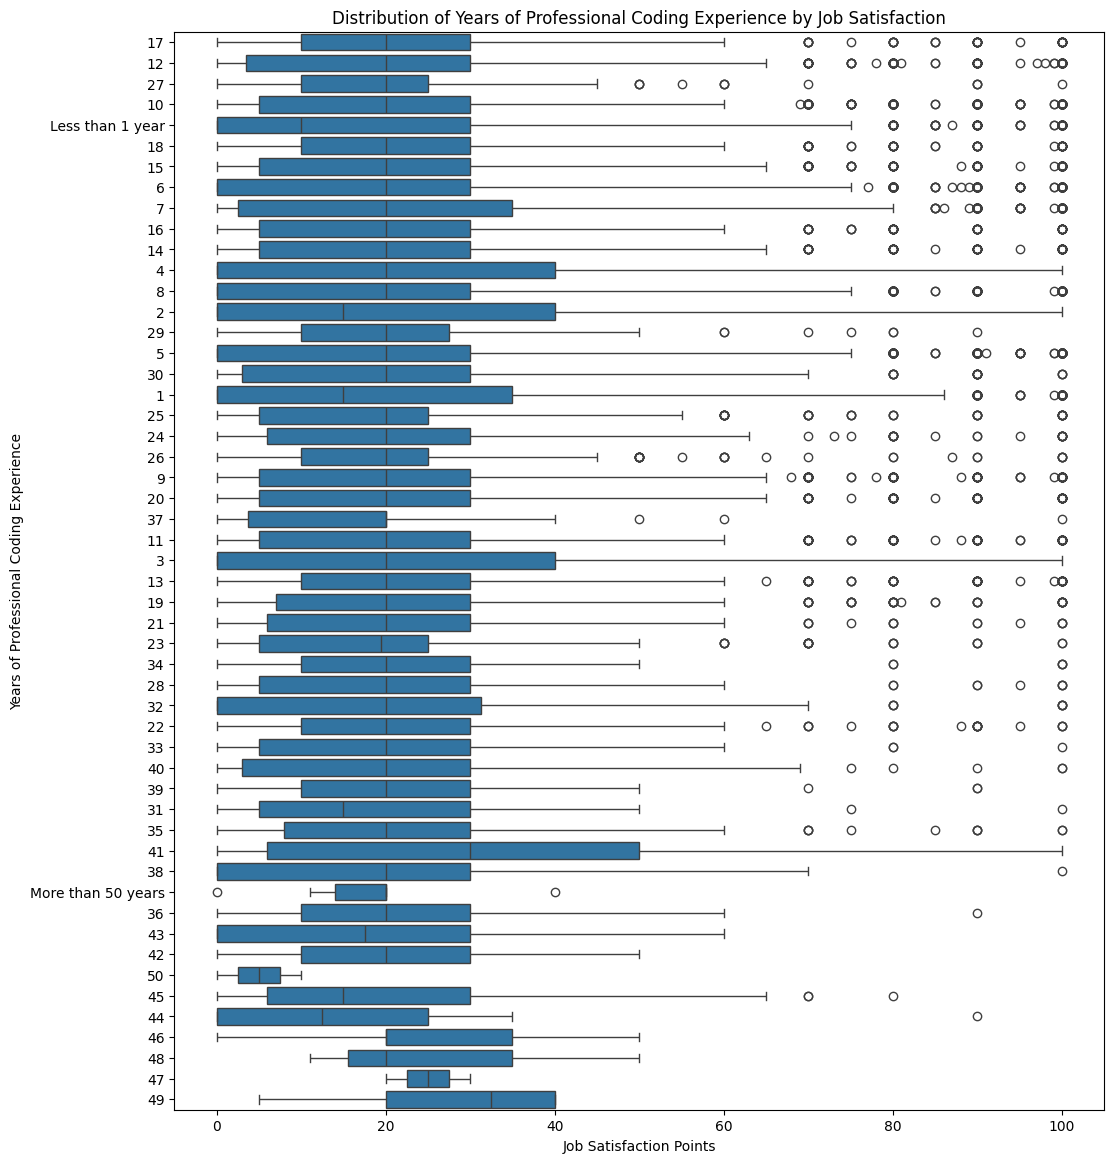

In [83]:

# Load the data
try:
    df = pd.read_csv('survey-data.csv')
except FileNotFoundError:
    print("Error: 'survey-data.csv' not found. Please check the file path.")
    exit()

# Filter out missing values
df_filtered = df[df['YearsCodePro'].notna() & df['JobSatPoints_6'].notna()]

# Create the box plot
plt.figure(figsize=(12, 14))
sns.boxplot(x='JobSatPoints_6', y='YearsCodePro', data=df_filtered)

# Set labels and title
plt.xlabel('Job Satisfaction Points')
plt.ylabel('Years of Professional Coding Experience')
plt.title('Distribution of Years of Professional Coding Experience by Job Satisfaction')

# Show the plot
plt.show()

### Final Step: Close the Database Connection


After completing the lab, close the connection to the SQLite database:


In [84]:
conn.close()

## Summary


In this lab, you used box plots to visualize various aspects of the dataset, focusing on:

- Visualize distributions of compensation and age.

- Explore relationships between compensation, job satisfaction, and professional coding experience.

- Analyze data composition across developer roles and countries.

- Compare compensation across employment types and satisfaction levels.

Box plots provided clear insights into the spread, outliers, and central tendencies of various features in the dataset.


## Authors:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


<!--## Change Log
|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|               
|2024-10-07|1.2|Madhusudan Moole|Reviewed and updated lab|                                                                                      
|2024-10-06|1.0|Raghul Ramesh|Created lab|-->


Copyright © IBM Corporation. All rights reserved.
